### Name : Limalka Sadith
### Index No : 190538N

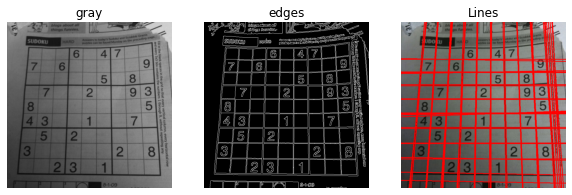

In [4]:
#Q1
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread('sudoku.png',cv.IMREAD_COLOR)
gray=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
edges=cv.Canny(gray,20,120,apertureSize=3)
lines=cv.HoughLines(edges,1,np.pi/180,175)

for line in lines:
    rho,theta=line[0]
    a=np.cos(theta)
    b=np.sin(theta)
    x0,y0=a*rho,b*rho
    x1,y1=int(x0+1000*(-b)),int(y0+1000*(a))
    x2,y2=int(x0-1000*(-b)),int(y0-1000*(a))
    cv.line(im,(x1,y1),(x2,y2),(0,0,255),2)

fig, ax = plt.subplots(1,3,figsize=(10,5))    
ax[0].imshow(cv.cvtColor(gray,cv.COLOR_BGR2RGB))
ax[0].set_title("gray")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(edges,cv.COLOR_BGR2RGB))
ax[1].set_title("edges")
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[2].set_title("Lines")
ax[2].axis('off')
plt.show()


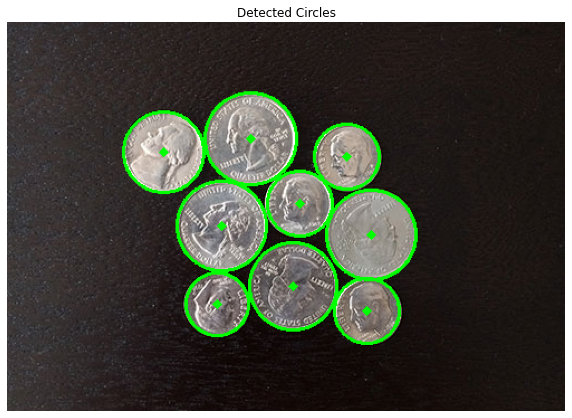

In [5]:
#Q2
import cv2 as cv
import numpy as np
im=cv.imread('coins.jpg',cv.IMREAD_COLOR)
gray=cv.cvtColor(im,cv.COLOR_BGR2GRAY)

circles=cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50,param1=200,param2=60,minRadius=20,maxRadius=50)
circles=np.uint16(np.around(circles))

for i in circles[0,:]:
    cv.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(im,(i[0],i[1]),2,(0,255,0),3)
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax.set_title('Detected Circles')
ax.axis('off')
plt.show()

x=29.0,y=109.0,scale=1.0,orientation=0.0,p1=(4, 76),p2=(54, 141)


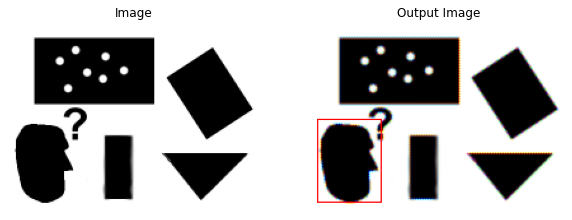

In [6]:
#Q3
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im=cv.imread('pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
temp1=cv.imread('templ.png',cv.IMREAD_REDUCED_GRAYSCALE_2)

im_edges=cv.Canny(im,50,250)
temp1_edges=cv.Canny(temp1,50,250)
alg=cv.createGeneralizedHoughGuil()
alg.setTemplate(temp1_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions,votes=alg.detect(im_edges)

out=cv.cvtColor(im,cv.COLOR_BAYER_BG2BGR)
for x,y,scale,orientation in positions[0]:
    halfHeight=temp1.shape[0]/2.*scale
    halfWidth=temp1.shape[1]/2.*scale
    p1=(int(x-halfWidth),int(y-halfHeight))
    p2=(int(x+halfWidth),int(y+halfHeight))
    print("x={},y={},scale={},orientation={},p1={},p2={}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out,p1,p2,(0,0,255))
fig, ax = plt.subplots(1,2,figsize=(10,5))    
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title("Image")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(out,cv.COLOR_BGR2RGB))
ax[1].set_title("Output Image")
ax[1].axis('off')
plt.show()

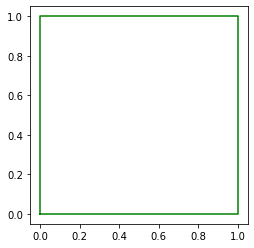

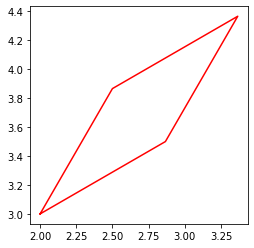

In [5]:
#Q4
import matplotlib.pyplot as plt
import numpy as np

a, b, c, d = [0, 0, 1],[0, 1, 1] ,[1, 1, 1] ,[1, 0, 1]

X = np.array([a,b,c,d]).T

x = np.append(X[0,:],X[0,0])
y = np.append(X[1,:],X[1,0])

theta = np.pi*30/180
tx, ty = 2, 3
s=1 
H = np.array([[s*np.cos(theta), s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta),ty], [0,0,1]])
Y = H @ X

fig, ax = plt.subplots()
ax.plot(x, y, color='g')
ax.set_aspect('equal')

fig, ax = plt.subplots()

ax.set_aspect('equal')

x = np.append(Y[0,:],Y[0,0])
y = np.append(Y[1,:],Y[1,0])

ax.plot(x, y, color='r')

plt.show()

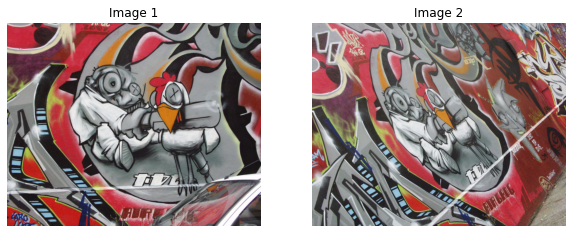

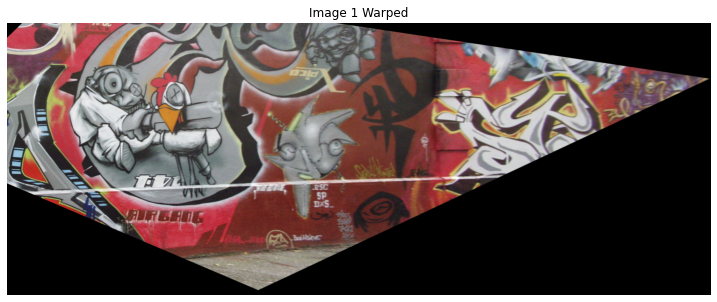

In [7]:
#Q5
import cv2 as cv
import numpy as np

im1 = cv.imread('images/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/img4.ppm', cv.IMREAD_ANYCOLOR)

H=np.array([[6.6378505e-01 ,  6.8003334e-01,  -3.1230335e+01],
  [-1.4495500e-01,   9.7128304e-01,   1.4877420e+02],
   [4.2518504e-04,  -1.3930359e-05,   1.0000000e+00]])

im1to4=cv.warpPerspective(im4,np.linalg.inv(H),(2200,850))
fig, ax = plt.subplots(1,2,figsize=(10,5))    
ax[0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[0].set_title("Image 1")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(im4,cv.COLOR_BGR2RGB))
ax[1].set_title("Image 2")
ax[1].axis('off')
fig, ax = plt.subplots(1,1,figsize=(20,5)) 
ax.imshow(cv.cvtColor(im1to4,cv.COLOR_BGR2RGB))
ax.set_title("Image 1 Warped")
ax.axis('off')
plt.show()